In [1]:
import datetime
from glob import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D
from keras.models import Model
from vis.visualization import visualize_cam 

testing_data_path = r"D:\HerniaModelStudy\LayerTesting"
validation_data_path = r"D:\HerniaModelStudy\LayerTesting2"

model_save_path = r"D:\HerniaModelStudy\SavedModels"
notebook_save_path = r"D:\HerniaModelStudy\SavedNotebooks"

model_to_validate_path = r"D:\HerniaModelStudy\SavedModels\model_2019-07-29_16-23-46.h5"

classes = ['None', 'Skin', 'Fat', 'Extob', 'Spchd', 'Sack']

resized_image_size = 64

if not os.path.exists(validation_data_path):
    print("Could not find folder: " + validation_data_path)
    raise

if not os.path.exists(testing_data_path):
    print("Could not find folder: {}".format(testing_data_path))
    raise

Using TensorFlow backend.


In [2]:
testing_globs = []
validation_globs = []

num_classes = len(classes)

print("Number of classes: {}".format(num_classes))

for i in range(num_classes):
    validation_class_path = os.path.join(validation_data_path, classes[i])
    testing_class_path = os.path.join(testing_data_path, classes[i])
    
    validation_class_glob = glob(os.path.join(validation_class_path, "*.png"))
    testing_class_glob = glob(os.path.join(testing_class_path, "*.png"))
    
    validation_globs.append(validation_class_glob)
    testing_globs.append(testing_class_glob)

Number of classes: 6


<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

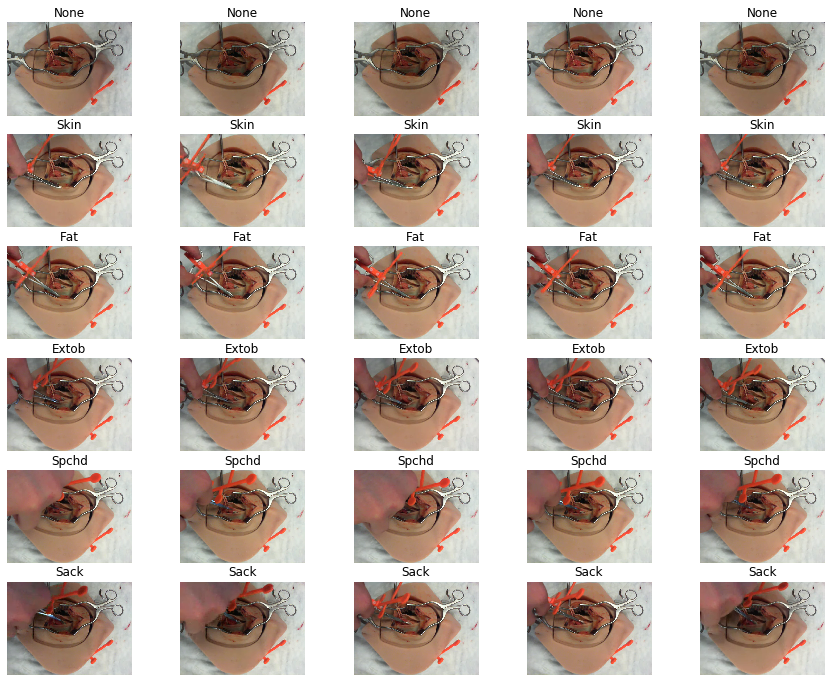

In [3]:
# Show sample images of all classes

num_choices = 5
random_choices = []
labels = []

for i in range(num_classes):
    random_choice = np.random.choice(testing_globs[i], num_choices)
    random_choices.append(random_choice)
    labels.append(num_choices * [classes[i]])

    plt.figure(figsize=(3*num_choices,2*num_classes))

for class_index in range(num_classes):
    for choice_index in range(num_choices):
        im = Image.open(random_choices[class_index][choice_index]).convert('RGB')
        plt.subplot(num_classes, num_choices, class_index * num_choices + choice_index + 1)
        plt.title(labels[class_index][choice_index])
        plt.imshow(np.asarray(im))
        plt.axis('off')

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

batch_size = 32

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_generator = test_datagen.flow_from_directory(
    testing_data_path,
    target_size=(resized_image_size, resized_image_size),
    batch_size=batch_size,
    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
    validation_data_path,
    target_size=(resized_image_size, resized_image_size),
    batch_size=batch_size,
    class_mode='categorical')


Found 727 images belonging to 6 classes.
Found 723 images belonging to 6 classes.


In [5]:
from keras.models import load_model

model = load_model(model_to_validate_path)
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
X_input (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 32)        4640      
_______________________________________

In [6]:
results = model.evaluate_generator(valid_generator, len(valid_generator))

In [13]:
results

[1.1402960779920819, 0.7999078012271211]

In [ ]:
predictions = 